In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#load the dataset
census= pd.read_csv('census_11-2.csv') 

In [3]:
census #call up the dataset

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Leeds Lane,Sian,Wright,64,Head,Single,Female,"Accountant, chartered certified",None,Catholic
1,1,Leeds Lane,Danielle,Dunn,37,None,Divorced,Female,Software engineer,None,None
2,1,Leeds Lane,Anthony,Thorpe,18,None,Single,Male,Student,None,NaN
3,2,Leeds Lane,Charlie,Cross,33,Head,Married,Male,Mental health nurse,None,Christian
4,2,Leeds Lane,Olivia,Cross,35,Wife,Married,Female,Secretary/administrator,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8277,1,Gwynedd Manor,Lisa,Allen,24,Daughter,Divorced,Female,"Engineer, agricultural",None,Christian
8278,1,Gwynedd Manor,Rachael,Allen,23,Daughter,Single,Female,"Loss adjuster, chartered",None,Christian
8279,1,Gwynedd Manor,Connor,Allen,18,Son,Divorced,Male,Student,None,Christian
8280,1,Gwynedd Manor,Jane,Allen,14,Daughter,NaN,Female,Student,None,NaN


### DATA EXPLORATION

In [4]:
#import the library 
from pandas_profiling import ProfileReport

In [5]:
!pip install pandas-profiling

In [6]:
import pandas_profiling as pf

In [7]:
pf.ProfileReport(census).to_file('Overview of Age')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile=ProfileReport(census,title="An Overview of Census Data")

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
census.columns #to list all the column names

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [11]:
census.shape #to check for the dimensions of the data(number of rows and columns)

(8282, 11)

In [12]:
census.info() #to check for the general information on the data(data types,column names,number of rows, number of columns etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8282 entries, 0 to 8281
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8279 non-null   object
 1   Street                         8282 non-null   object
 2   First Name                     8280 non-null   object
 3   Surname                        8282 non-null   object
 4   Age                            8282 non-null   object
 5   Relationship to Head of House  8282 non-null   object
 6   Marital Status                 6401 non-null   object
 7   Gender                         8282 non-null   object
 8   Occupation                     8282 non-null   object
 9   Infirmity                      8282 non-null   object
 10  Religion                       6356 non-null   object
dtypes: object(11)
memory usage: 711.9+ KB


In [13]:
census.dtypes #to check for the data types

House Number                     object
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [14]:
census.describe(include='all') #check the description/statistics of the data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,8279,8282,8280,8282,8282,8282,6401,8282,8282,8282,6356
unique,235,105,373,672,121,30,5,5,1074,11,16
top,1,Robinson Way,Hollie,Smith,19,Head,Single,Female,Student,None,None
freq,340,864,39,232,160,3100,2913,4352,1573,8228,2773


### DATA CLEANING

In [15]:
census.isnull().sum() #check for the missing values

House Number                        3
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1881
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1926
dtype: int64

### CLEANING THE AGE COLUMN

In [16]:
#to explore the age column
age = census["Age"]

In [17]:
age

0       64
1       37
2       18
3       33
4       35
        ..
8277    24
8278    23
8279    18
8280    14
8281     9
Name: Age, Length: 8282, dtype: object

In [18]:
#check the data type for age
age.apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
8277    <class 'str'>
8278    <class 'str'>
8279    <class 'str'>
8280    <class 'str'>
8281    <class 'str'>
Name: Age, Length: 8282, dtype: object

In [19]:
census['Age'].isna().sum()

0

In [20]:
census['Age'].unique() #to check for the unique rows

array(['64', '37', '18', '33', '35', '8', '5', '60', '61', '29', '28',
       '1', '56', '76', '24', '34', '39', '50', '59', '10', '3', '27',
       '57', '42', '23', '58', '36', '38', '40', '55', '52', '11', '19',
       '2', '15', '9', '6', '47', '16', '12', '25', '22', '21', '14', '0',
       '70', '66', '83', '80', '68', '48', '77', '46', '53', '51', '71',
       '32', '43', '20', '85', '87', '81', '92', '30', '63', '65', '49',
       '73', '88', '54', '89', '78', '82', '74', '69', '45', '31', '62',
       '17', '72', '67', '13', '4', '7', '41', '44', '75', '103', '101',
       '102', '109', '26', '86', '84', '94', '90', '79', '96', ' ', '183',
       '105', '4.5', '91', '95', '98', '60.24768262', '100', '-1', 'Four',
       'Fifty Two', '97', '5.25', 'Seventeen', '93', '63.7082276', '104',
       '86.95973188', '85.95973188', '0.3', '1.75', '108'], dtype=object)

In [21]:
census['Age'].nunique() #to check for the number of unique rows before cleaning

121

In [22]:
age.value_counts()  #to check how many times each of the unique rows occur 

19     160
41     146
39     141
42     141
35     141
      ... 
109      1
4.5      1
183      1
         1
108      1
Name: Age, Length: 121, dtype: int64

In [23]:
#to locate the row with a very high age by using the index location
census.loc[census['Age']== '183']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1943,30,Martin Plain,Jason,Morris,183,Head,Widowed,Male,"Retired Engineer, biomedical",None,Christian


In [24]:
census.loc[census.index[1939:1948]] #get the index location for entries around the particular row you want to fix

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1939,26,Martin Plain,Ashley,Patel,28,Head,Single,Male,Unemployed,None,None
1940,27,Martin Plain,Marc,Morgan,35,Head,Single,Male,Herpetologist,None,Methodist
1941,28,Martin Plain,Thomas,Morgan,18,Head,Single,Male,Student,None,NaN
1942,29,Martin Plain,Ross,Owen,60,Head,Single,Male,Production manager,None,Christian
1943,30,Martin Plain,Jason,Morris,183,Head,Widowed,Male,"Retired Engineer, biomedical",None,Christian
1944,31,Martin Plain,Ashley,Walsh,30,Head,Single,Male,Unemployed,None,Methodist
1945,32,Martin Plain,Valerie,Smith,42,Head,Single,Female,Insurance risk surveyor,None,None
1946,33,Martin Plain,Andrea,Fowler,49,Head,Divorced,Female,"Research officer, government",None,Catholic
1947,33,Martin Plain,Tom,Fowler,2,Son,NaN,Male,Child,None,NaN


In [25]:
census.loc[census['Age']== ' '] #to locate the row with an empty entry by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1237,13,Scotland Groves,Roger,Connor,,Head,Single,Male,University Student,None,None


In [26]:
census.loc[census.index[[1234,1235,1236, 1237, 1238, 1239]]] #get the index location for entries around the particular row you want to fix

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1234,12,Scotland Groves,Jennifer,Kennedy,42,Head,Married,Female,Unemployed,None,Methodist
1235,12,Scotland Groves,Aaron,Kennedy,42,Husband,Married,Male,Theatre stage manager,None,Methodist
1236,12,Scotland Groves,Simon,Kennedy,16,Son,NaN,Male,Student,None,NaN
1237,13,Scotland Groves,Roger,Connor,,Head,Single,Male,University Student,None,None
1238,14,Scotland Groves,Billy,O'Brien,29,Head,Single,Male,"Engineer, technical sales",None,Christian
1239,15,Scotland Groves,Dennis,Abbott,38,Head,Divorced,Male,Horticultural therapist,None,None


In [27]:
# to replace the age in words to number
census['Age']= census['Age'].replace ('Four','4')
census['Age']= census['Age'].replace ('Fifty Two','52')
census['Age']= census['Age'].replace ('Seventeen','17')

#imputation of wrong entries with correct values
census['Age']= census['Age'].replace (' ','0')
census['Age']= census['Age'].replace ('-1','0')
census['Age']= census['Age'].replace ('183','120')

In [28]:
#to change the data type for age from string to float
census['Age'] = census['Age'].astype(float)


In [29]:
#to change the data type to integer
census['Age'] = census['Age'].astype(int)


In [30]:
census['Age'].unique() #to check again for the unique rows

array([ 64,  37,  18,  33,  35,   8,   5,  60,  61,  29,  28,   1,  56,
        76,  24,  34,  39,  50,  59,  10,   3,  27,  57,  42,  23,  58,
        36,  38,  40,  55,  52,  11,  19,   2,  15,   9,   6,  47,  16,
        12,  25,  22,  21,  14,   0,  70,  66,  83,  80,  68,  48,  77,
        46,  53,  51,  71,  32,  43,  20,  85,  87,  81,  92,  30,  63,
        65,  49,  73,  88,  54,  89,  78,  82,  74,  69,  45,  31,  62,
        17,  72,  67,  13,   4,   7,  41,  44,  75, 103, 101, 102, 109,
        26,  86,  84,  94,  90,  79,  96, 120, 105,  91,  95,  98, 100,
        97,  93, 104, 108])

In [31]:
census['Age'].nunique() #to check for the number of unique rows after cleaning

108

### CLEANING THE RELIGION COLUMN

In [32]:
#to explore for religion
religion = census["Religion"]

In [33]:
religion

0        Catholic
1            None
2             NaN
3       Christian
4       Christian
          ...    
8277    Christian
8278    Christian
8279    Christian
8280          NaN
8281          NaN
Name: Religion, Length: 8282, dtype: object

In [34]:
religion.unique() #to check for the unique rows

array(['Catholic', 'None', nan, 'Christian', 'Muslim', 'Jewish',
       'Methodist', 'Sith', 'Sikh', 'Undecided', ' ', 'Buddist', 'Quaker',
       'Hindu', 'Pagan', 'Nope', 'Housekeeper'], dtype=object)

In [35]:
religion.nunique() #to check for the number of unique rows before cleaning

16

In [36]:
census.loc[census['Religion']== 'Housekeeper'] #to locate the row with housekeeper as religion by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8007,175,Mustard View,Donald-Mark,Weston,21,Head,Single,Male,University Student,None,Housekeeper


In [37]:
census.loc[census.index[[8004,8005, 8006, 8007, 8008, 8009]]] #get the index location for entries around the particular row you want to fix 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8004,173,Mustard View,Ronald,Dixon,48,Partner,Single,Male,"Radiographer, therapeutic",None,None
8005,173,Mustard View,Olivia,Wood,5,Daughter,NaN,Female,Student,None,NaN
8006,174,Mustard View,Jacqueline,Morgan,59,Head,Divorced,Female,Furniture conservator/restorer,None,Jewish
8007,175,Mustard View,Donald-Mark,Weston,21,Head,Single,Male,University Student,None,Housekeeper
8008,175,Mustard View,Hannah,Poole,19,None,Single,Female,University Student,None,None
8009,175,Mustard View,Rita,Reed,21,None,Single,Female,University Student,None,None


In [38]:
census.loc[census['Religion']== ' '] #to locate the row with empty entries by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3030,4,Robinson Way,Debra,Lewis,40,Daughter,Single,Female,Mechanical engineer,None,
5690,9,Johnson Light,Rachel,Hudson,13,Daughter,NaN,Female,Student,,
5755,33,Johnson Light,Scott,Mason,14,Son,NaN,Male,Student,None,


In [39]:
census.loc[census.index[[3028,3029,3030,3031,3032,5688,5689,5690,5691,5692,5753,5754,5755,5756,5757,5758]]]#get the index location for entries around the particular row you want to fix

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3028,4,Robinson Way,Lucy,Lewis,63,Head,Married,Female,Dancer,None,Christian
3029,4,Robinson Way,Christopher,Lewis,68,Husband,Married,Male,Retired Clinical research associate,None,Christian
3030,4,Robinson Way,Debra,Lewis,40,Daughter,Single,Female,Mechanical engineer,None,
3031,5,Robinson Way,Margaret,O'Sullivan,72,Head,Widowed,Female,"Retired Nurse, children's",None,None
3032,6,Robinson Way,Ross,Murray,89,Head,Widowed,Male,Retired Make,None,Christian
5688,9,Johnson Light,Josh,Hudson,61,Husband,Married,Male,Music therapist,None,None
5689,9,Johnson Light,Mark,Hudson,17,Son,NaN,Male,Student,None,NaN
5690,9,Johnson Light,Rachel,Hudson,13,Daughter,NaN,Female,Student,,
5691,10,Johnson Light,Katie,Slater,67,Head,Divorced,Female,"Engineer, drilling",None,None
5692,10,Johnson Light,Kathryn,Slater,29,Daughter,Divorced,Female,Records manager,None,None


In [40]:
#missing values in religion
religion.isnull().sum()

1926

In [41]:
#replacing with the correct values
census['Religion'] = census['Religion'].replace('Nope','None')
census['Religion'] = census['Religion'].replace(' ','None')
census['Religion'] = census['Religion'].replace('Housekeeper','None')

In [42]:
census['Religion'].replace(np.nan,"Undecided",inplace=True) #replacing the nan values

In [43]:
religion.isnull().sum() #missing values in religion after cleaning

0

In [44]:
religion.unique() #to check for the unique rows

array(['Catholic', 'None', 'Undecided', 'Christian', 'Muslim', 'Jewish',
       'Methodist', 'Sith', 'Sikh', 'Buddist', 'Quaker', 'Hindu', 'Pagan'],
      dtype=object)

In [45]:
religion.nunique() #to check for the number of unique rows after cleaning

13

In [46]:
religion.value_counts() #the non missing rows

None         2779
Undecided    1932
Christian    1911
Catholic      914
Methodist     533
Muslim        116
Sikh           48
Jewish         42
Buddist         2
Hindu           2
Sith            1
Quaker          1
Pagan           1
Name: Religion, dtype: int64

In [47]:
census.info() # #to check for the general information on the data(data types,column names,number of rows, number of columns etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8282 entries, 0 to 8281
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8279 non-null   object
 1   Street                         8282 non-null   object
 2   First Name                     8280 non-null   object
 3   Surname                        8282 non-null   object
 4   Age                            8282 non-null   int32 
 5   Relationship to Head of House  8282 non-null   object
 6   Marital Status                 6401 non-null   object
 7   Gender                         8282 non-null   object
 8   Occupation                     8282 non-null   object
 9   Infirmity                      8282 non-null   object
 10  Religion                       8282 non-null   object
dtypes: int32(1), object(10)
memory usage: 679.5+ KB


### CLEANING THE HOUSE NUMBER COLUMN

In [48]:
census['House Number'] #explore the house number column

0       1
1       1
2       1
3       2
4       2
       ..
8277    1
8278    1
8279    1
8280    1
8281    1
Name: House Number, Length: 8282, dtype: object

In [49]:
census['House Number'].apply(type) #check for the data type

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
8277    <class 'str'>
8278    <class 'str'>
8279    <class 'str'>
8280    <class 'str'>
8281    <class 'str'>
Name: House Number, Length: 8282, dtype: object

In [50]:
census['House Number'].unique() #check for the unique rows before cleaning

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', nan,
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '144

In [51]:
census['House Number'].nunique() #check for the number of unique rows before cleaning

235

In [52]:
census['House Number'].value_counts()# check for the rows that are not missing

1                        340
4                        267
2                        245
3                        243
7                        240
                        ... 
Seventy                    1
198                        1
191                        1
211                        1
One Hundred and Seven      1
Name: House Number, Length: 235, dtype: int64

In [53]:
census.loc[census['House Number']== ' ']  #to locate the row with empty entries by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [54]:
# to replace the house number in words to number
census['House Number']= census['House Number'].replace ('Seventy','70')
census['House Number']= census['House Number'].replace ('One Hundred and Seven','107')

# to replace the nan values with 1
census['House Number'].replace(np.nan,"0",inplace=True)


In [55]:
census['House Number'].unique() #to check for the unique rows after cleaning

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '0',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '144

In [56]:
census['House Number'] = census['House Number'].astype(int) #change the data type from string to integer



In [57]:
census['House Number'].apply(type) #confirm the data type

0       <class 'int'>
1       <class 'int'>
2       <class 'int'>
3       <class 'int'>
4       <class 'int'>
            ...      
8277    <class 'int'>
8278    <class 'int'>
8279    <class 'int'>
8280    <class 'int'>
8281    <class 'int'>
Name: House Number, Length: 8282, dtype: object

In [58]:
census.info()  #to check for the general information on the data(data types,column names,number of rows, number of columns etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8282 entries, 0 to 8281
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8282 non-null   int32 
 1   Street                         8282 non-null   object
 2   First Name                     8280 non-null   object
 3   Surname                        8282 non-null   object
 4   Age                            8282 non-null   int32 
 5   Relationship to Head of House  8282 non-null   object
 6   Marital Status                 6401 non-null   object
 7   Gender                         8282 non-null   object
 8   Occupation                     8282 non-null   object
 9   Infirmity                      8282 non-null   object
 10  Religion                       8282 non-null   object
dtypes: int32(2), object(9)
memory usage: 647.2+ KB


### CLEANING THE MARITAL STATUS COLUMN

In [59]:
#to explore marital status

census['Marital Status']

0         Single
1       Divorced
2         Single
3        Married
4        Married
          ...   
8277    Divorced
8278      Single
8279    Divorced
8280         NaN
8281         NaN
Name: Marital Status, Length: 8282, dtype: object

In [60]:
census['Marital Status'].unique() #to check for the unique rows

array(['Single', 'Divorced', 'Married', nan, 'Widowed', ' '], dtype=object)

In [61]:
census['Marital Status'].value_counts() #to check for the non missing rows

Single      2913
Married     2323
Divorced     797
Widowed      365
               3
Name: Marital Status, dtype: int64

In [62]:
census['Marital Status'].isna().sum() #to check for the missing rows

1881

In [63]:
census.loc[census['Marital Status']== ' '] #to locate the row with empty entries by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
239,6,Walsh Avenue,Brandon,Phillips,60,Head,,Male,Geophysicist/field seismologist,None,Christian
5130,2,Coventry Avenue,Jenna,Mitchell,12,Daughter,,Female,Student,None,Undecided
6692,35,September Motorway,Joshua,Hopkins,62,Head,,Male,"Therapist, drama",None,Methodist


In [64]:
#to replace nan values of marital status
census['Marital Status'].replace(np.nan,"Single",inplace=True)

#to replace empty values
census['Marital Status'] = census['Marital Status'].replace(' ','Single')

In [65]:
census['Marital Status'].unique() #to check for the unique rows after cleaning

array(['Single', 'Divorced', 'Married', 'Widowed'], dtype=object)

In [66]:
census['Marital Status'].value_counts()

Single      4797
Married     2323
Divorced     797
Widowed      365
Name: Marital Status, dtype: int64

In [67]:
census['Marital Status'].describe() #to check for the descriptive statistics

count       8282
unique         4
top       Single
freq        4797
Name: Marital Status, dtype: object

### CLEANING THE FIRST NAME COLUMN

In [68]:
#to explore first name

census['First Name']


0           Sian
1       Danielle
2        Anthony
3        Charlie
4         Olivia
          ...   
8277        Lisa
8278     Rachael
8279      Connor
8280        Jane
8281      Nicola
Name: First Name, Length: 8282, dtype: object

In [69]:
census['First Name'].unique() #check for the unique rows before cleaning

array(['Sian', 'Danielle', 'Anthony', 'Charlie', 'Olivia', 'Rachael',
       'Kieran', 'Joyce', 'Victor', 'Derek', 'Hollie', 'Toby', 'Jordan',
       'Rosie', 'Ann', 'Amelia', 'Judith', 'Amanda', 'Stewart', 'Ben',
       'Bryan', 'Jonathan', 'Harry', 'Stanley', 'Jayne', 'Stephen',
       'Michelle', 'Andrew', 'Howard', 'Cheryl', 'Vanessa', 'Harriet',
       'Elliot', 'Oliver', 'Megan', 'Antony', 'Francesca', 'Beth',
       'Carly', 'Clive', 'Mary', 'Maurice', 'Iain', 'Abigail', 'Lesley',
       'Sandra', 'Frederick', 'Conor', 'Clare', 'Alan', 'Jasmine',
       'Brandon', 'Robert', 'Jean', 'Barry', 'Martin', 'Nicola', 'George',
       'Bethan', 'Jacqueline', 'Robin', 'Frances', 'Marc', 'Charlene',
       'Amy', 'Dominic', 'Emily', 'Stacey', 'Benjamin', 'Nathan',
       'Louise', 'Steven', 'Kirsty', 'Aaron', 'Nigel', 'Aimee', 'Lisa',
       'Donna', 'Damien', 'Gerald', 'Maureen', 'Leanne', 'Susan', 'Paul',
       'Lindsey', 'Joanna', 'Charlotte', 'Mandy', 'Gerard', 'Lewis',
       'Valer

In [70]:
census['First Name'].value_counts() #to check for the number of non missing rows

Hollie                      39
Michelle                    36
Holly                       35
Lynda                       34
Jenna                       33
                            ..
N                            1
Denis-Hillary                1
Robert-Bob                   1
Maureen-Synthia-Clarette     1
Donald-Mark                  1
Name: First Name, Length: 373, dtype: int64

In [71]:
census['First Name'].isna().sum() #to check for the missing rows

2

In [72]:
census.loc[census['First Name']== ' '] #to locate the row with empty entries by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3791,212,Robinson Way,,Davis,10,Daughter,Single,Female,Student,None,Undecided


In [73]:
census.loc[census.index[3787:3797]] #get the index location for entries around the particular row you want to fix

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3787,211,Robinson Way,David,Walters,32,Head,Divorced,Male,Tree surgeon,None,Catholic
3788,212,Robinson Way,Debra,Davis,38,Head,Married,Female,Education administrator,None,None
3789,212,Robinson Way,Phillip,Davis,38,Husband,Married,Male,Unemployed,None,None
3790,212,Robinson Way,Mandy,Davis,11,Daughter,Single,Female,Student,None,Undecided
3791,212,Robinson Way,,Davis,10,Daughter,Single,Female,Student,None,Undecided
3792,213,Robinson Way,Hilary,Cook,36,Head,Widowed,Female,Air traffic controller,None,None
3793,213,Robinson Way,Anna,Cook,0,Daughter,Single,Female,Child,None,Undecided
3794,213,Robinson Way,Chloe,Giles,27,Lodger,Single,Female,Glass blower/designer,None,None
3795,213,Robinson Way,Gerald,Wheeler,30,Lodger,Divorced,Male,"Investment banker, corporate",None,None
3796,214,Robinson Way,Gerard,Gordon,28,Head,Single,Male,Primary school teacher,None,None


In [74]:
census[census['First Name'].isnull()] #to check for the nan entries

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3522,138,Robinson Way,NaN,Stewart Chapman,25,Grandson,Single,Male,Animal technologist,None,None
7285,3,Grace Avenue,NaN,Claire Knowles-Hart,8,Neice,Single,Female,Student,None,Undecided


In [75]:
census['First Name'].fillna('Unknown')#filling the nan entries with unknown

0           Sian
1       Danielle
2        Anthony
3        Charlie
4         Olivia
          ...   
8277        Lisa
8278     Rachael
8279      Connor
8280        Jane
8281      Nicola
Name: First Name, Length: 8282, dtype: object

In [76]:
census['First Name'] = census['First Name'].replace('Terry Marie','Terry-Marie') #replace the incoorect entries

In [77]:
census['First Name'].replace(np.nan,"Unknown",inplace=True) #filling the nan values with unknown

In [78]:
census['First Name'].isna().sum() #check for the missing entries after cleaning

0

In [79]:
census['First Name'].unique() #the unique rows after cleaning

array(['Sian', 'Danielle', 'Anthony', 'Charlie', 'Olivia', 'Rachael',
       'Kieran', 'Joyce', 'Victor', 'Derek', 'Hollie', 'Toby', 'Jordan',
       'Rosie', 'Ann', 'Amelia', 'Judith', 'Amanda', 'Stewart', 'Ben',
       'Bryan', 'Jonathan', 'Harry', 'Stanley', 'Jayne', 'Stephen',
       'Michelle', 'Andrew', 'Howard', 'Cheryl', 'Vanessa', 'Harriet',
       'Elliot', 'Oliver', 'Megan', 'Antony', 'Francesca', 'Beth',
       'Carly', 'Clive', 'Mary', 'Maurice', 'Iain', 'Abigail', 'Lesley',
       'Sandra', 'Frederick', 'Conor', 'Clare', 'Alan', 'Jasmine',
       'Brandon', 'Robert', 'Jean', 'Barry', 'Martin', 'Nicola', 'George',
       'Bethan', 'Jacqueline', 'Robin', 'Frances', 'Marc', 'Charlene',
       'Amy', 'Dominic', 'Emily', 'Stacey', 'Benjamin', 'Nathan',
       'Louise', 'Steven', 'Kirsty', 'Aaron', 'Nigel', 'Aimee', 'Lisa',
       'Donna', 'Damien', 'Gerald', 'Maureen', 'Leanne', 'Susan', 'Paul',
       'Lindsey', 'Joanna', 'Charlotte', 'Mandy', 'Gerard', 'Lewis',
       'Valer

In [80]:
#to explore the surname column
census['Surname'].unique() 

array(['Wright', 'Dunn', 'Thorpe', 'Cross', 'Hutchinson', 'Johnson',
       'Wood', 'Taylor', 'Edwards', 'Elliott', 'Lane', 'Saunders',
       'Bartlett', 'Holland', 'Davis', 'Jones', 'Reid', 'Baker',
       'Alexander', 'Francis', 'Fletcher', 'Brown', 'Turner', 'Smith',
       'Clayton-Turner', 'Hodgson', 'Green-Hodgson', 'Flynn', 'Shaw',
       'Harris', 'Tucker', 'Young', 'Whitehead', 'Clark', 'Hall',
       'Martin', 'Bates', 'Bennett', 'Lee', 'Clayton', 'Yates',
       'Robinson', 'Parry', 'Williams', 'Lloyd', 'Little', 'Wilson',
       'Russell', 'Wheeler', 'Barker', 'Bishop', 'Pearson', 'Ellis',
       'Hammond', 'Reynolds', 'Wall', 'Ward', 'Conway', 'Gardner', 'Ali',
       'Wilkinson', 'Roberts', 'Lewis', 'Holloway-Jones', 'Riley',
       'Newton', 'Harding', 'Adams', 'Burton', 'Carr', 'Burrows', 'Iqbal',
       'Cook', 'Hill', 'Lawrence', 'Matthews', 'Brooks', 'Richards',
       'Sullivan', 'Thompson', 'Barton', 'Moore', 'Godfrey', 'Akhtar',
       'Long', 'Steele', 'Foster',

### CLEANING THE GENDER COLUMN

In [81]:
census['Gender'].unique()#check the unique rows

array(['Female', 'Male', 'F', 'Fe male', 'M'], dtype=object)

In [82]:
census['Gender'].nunique() #check the number of unique rows before cleaning

5

In [83]:
#replace the incorrect entries with the correct values
census['Gender']= census['Gender'].replace ('Fe male','Female')
census['Gender']= census['Gender'].replace ('F','Female')
census['Gender']= census['Gender'].replace ('M','Male')

In [84]:
census['Gender'].unique() #the unique rows after cleaning

array(['Female', 'Male'], dtype=object)

In [85]:
census['Gender'].nunique() #the number of unique rows after cleaning

2

In [86]:
census['Gender'].value_counts() #the number of non missing rows

Female    4355
Male      3927
Name: Gender, dtype: int64

In [87]:
census.isna().sum() #check for the missing rows after cleaning

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

### CLEANING THE OCCUPATION COLUMN

In [88]:
census['Occupation'].unique() #to check for the unique rows

array(['Accountant, chartered certified', 'Software engineer', 'Student',
       ..., 'Microbiologist', 'Retired Engineer, production',
       'Retired Actor'], dtype=object)

In [89]:
census['Occupation'].value_counts() #to check the number of the non missing rows

Student                             1573
University Student                   538
Unemployed                           527
Child                                418
General practice doctor               16
                                    ... 
Retired Therapeutic radiographer       1
Retired Animal technologist            1
Retired Administrator, sports          1
Retired Games developer                1
Retired Actor                          1
Name: Occupation, Length: 1074, dtype: int64

In [90]:
census.loc[census['Occupation']== ' '] #to locate the row with empty entries by using the index location

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
169,64,Stanley Road,Stewart,Jones,22,Head,Married,Male,,None,None
6167,70,Nottingham Drive,Simon,Holt,52,Head,Single,Male,,None,None


In [91]:
census.loc[census.index[[169,170,171,172,6167,6168,6169,6170,6171,6172]]] #get the index location for entries around the particular row you want to fix

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
169,64,Stanley Road,Stewart,Jones,22,Head,Married,Male,,None,None
170,64,Stanley Road,Linda,Jones,23,Wife,Married,Female,"Therapist, occupational",None,None
171,65,Stanley Road,Susan,Brooks,21,Head,Married,Female,University Student,None,None
172,65,Stanley Road,Adam,Brooks,24,Husband,Married,Male,Secondary school teacher,None,None
6167,70,Nottingham Drive,Simon,Holt,52,Head,Single,Male,,None,None
6168,70,Nottingham Drive,Amelia,Murphy,51,Partner,Single,Female,English as a foreign language teacher,None,None
6169,70,Nottingham Drive,Fiona,Holt,13,Daughter,Single,Female,Student,None,Undecided
6170,70,Nottingham Drive,Vanessa,Holt,13,Daughter,Single,Female,Student,None,Undecided
6171,70,Nottingham Drive,Brian,Holt,11,Son,Single,Male,Student,None,Undecided
6172,71,Nottingham Drive,Megan,Brown,86,Head,Married,Female,Retired Arts administrator,None,None


In [92]:
census['Occupation']= census['Occupation'].replace (' ','Unemployed') #replace the missing rows with unemployed

In [93]:
census.loc[census['Occupation']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [94]:
#segment the rows with child as an occupation
census.loc[census['Occupation']== 'Child']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
12,4,Leeds Lane,Toby,Johnson,1,Son,Single,Male,Child,None,Undecided
16,6,Leeds Lane,Hollie,Edwards,1,Daughter,Single,Female,Child,None,Undecided
25,7,Leeds Lane,Harry,Bartlett,3,Grandson,Single,Male,Child,None,Undecided
34,10,Leeds Lane,Vanessa,Francis,3,Daughter,Single,Female,Child,None,Undecided
35,10,Leeds Lane,Harriet,Francis,3,Daughter,Single,Female,Child,None,Undecided
...,...,...,...,...,...,...,...,...,...,...,...
8143,10,Taylor Station,Toby,Webster-Roberts,2,Son,Single,Male,Child,None,Undecided
8151,13,Taylor Station,Charles,Watson,1,Son,Single,Male,Child,None,Undecided
8179,1,Outer Factory,William,Smith,3,Son,Single,Male,Child,None,Undecided
8242,1,Dean Barn,Jane,Nolan,4,Granddaughter,Single,Female,Child,None,Undecided


In [95]:
child_occupation = census[census['Age']<=8 & (census['Occupation']=='Child')] #segment the rows with child as an occupation and age 8 years and below

In [96]:
child_occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
73,1,Stanley Road,Amy,Flynn,0,Daughter,Single,Female,Child,None,Undecided
145,48,Stanley Road,Hayley,Newton,0,Daughter,Single,Female,Child,None,Undecided
385,7,Lee Drive,Marilyn,Archer,0,Daughter,Single,Female,Child,None,Undecided
445,18,Lee Drive,Ronald,Ahmed,0,Son,Single,Male,Child,None,Undecided
603,47,Lee Drive,Luke,Arnold,0,Son,Single,Male,Child,None,Undecided
...,...,...,...,...,...,...,...,...,...,...,...
7600,1,Bulldog Avenue,Ashleigh,O'Connor,0,Daughter,Single,Female,Child,None,Undecided
7720,18,Baxter Road,Irene,Bray,0,Daughter,Single,Female,Child,None,Undecided
7802,53,Mustard View,Amanda,Wood,0,Daughter,Single,Female,Child,None,Undecided
7962,148,Mustard View,Reece,Jones,0,Son,Single,Male,Child,None,Undecided


In [97]:
census['Occupation']= census['Occupation'].replace ('Child','None') #replace the child entries with none

In [98]:
census['Occupation'].unique() #check for the unique rows after cleaning

array(['Accountant, chartered certified', 'Software engineer', 'Student',
       ..., 'Microbiologist', 'Retired Engineer, production',
       'Retired Actor'], dtype=object)

### CLEANING THE RELATIONSHIP TO HEAD OF HOUSE COLUMN

In [99]:
#for relatioship to head of house
census['Relationship to Head of House']

0           Head
1           None
2           None
3           Head
4           Wife
          ...   
8277    Daughter
8278    Daughter
8279         Son
8280    Daughter
8281    Daughter
Name: Relationship to Head of House, Length: 8282, dtype: object

In [100]:
census['Relationship to Head of House'].unique() #check for the unique rows

array(['Head', 'None', 'Wife', 'Daughter', 'Son', 'Husband', 'Lodger',
       'Cousin', 'Grandson', 'Partner', 'Visitor', 'S on',
       'Step-Daughter', 'Granddaughter', 'Neice', 'Step-Son',
       'Adopted Son', 'Sibling', 'Nephew', 'wife', 'cousin', 'Hus band',
       'Adopted Daughter', 'Adopted Grandson', 'Dau ghter', 'lodger',
       'Gran dson', 'he ad', 'Hu-sband', 'son'], dtype=object)

In [101]:
census['Relationship to Head of House'].nunique() #check forthe number of unique rows before cleaning

30

In [102]:
#replace the incorrect entries with the correct values
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('S on','Son')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('Hus band','Husband')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('Dau ghter','Daughter')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('Gran dson','Grandson')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('he ad','Head')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('cousin','Cousin')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('wife','Wife')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('Hu-sband','Husband')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('son','Son')
census['Relationship to Head of House']= census['Relationship to Head of House'].replace ('Neice','Niece')

In [103]:
census['Relationship to Head of House'].unique() #check for the unique rows after cleaning

array(['Head', 'None', 'Wife', 'Daughter', 'Son', 'Husband', 'Lodger',
       'Cousin', 'Grandson', 'Partner', 'Visitor', 'Step-Daughter',
       'Granddaughter', 'Niece', 'Step-Son', 'Adopted Son', 'Sibling',
       'Nephew', 'Adopted Daughter', 'Adopted Grandson', 'lodger'],
      dtype=object)

In [104]:
census['Relationship to Head of House'].nunique() #check forthe number of unique rows after cleaning 

21

In [105]:
census.loc[census['Relationship to Head of House']== 'None'] #check the entries with none

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Leeds Lane,Danielle,Dunn,37,None,Divorced,Female,Software engineer,None,None
2,1,Leeds Lane,Anthony,Thorpe,18,None,Single,Male,Student,None,Undecided
31,9,Leeds Lane,Howard,Alexander,58,None,Single,Male,Advertising art director,None,Christian
88,9,Stanley Road,Donna,Hall,46,None,Single,Female,Therapeutic radiographer,None,Catholic
90,10,Stanley Road,Damien,Bates,53,None,Single,Male,Financial adviser,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8212,1,Jones Delve,James,Joyce,59,None,Single,Male,"Journalist, newspaper",None,Catholic
8219,1,Brooks House,Robert,Khan,23,None,Single,Male,"Administrator, charities/voluntary organisations",None,None
8220,1,Brooks House,Alan,Smith,26,None,Single,Male,Unemployed,None,Methodist
8221,1,Brooks House,Gary,Cooper,34,None,Single,Male,Unemployed,None,None


### CLEANING THE INFIRMITY COLUMN

In [106]:
census['Infirmity'].unique() #check for the unique rows

array(['None', 'Physical Dis ability', 'Physical Disability', ' ',
       'Blind', 'Disabled', 'Deaf', 'Unknown Infection', 'none',
       'ment al Disability', 'Mental Disability'], dtype=object)

In [107]:
census['Infirmity'].nunique()#check for the number of unique rows before cleaning

11

In [108]:
census.loc[census['Infirmity']== ' '] #index location for empty values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
441,17,Lee Drive,Alexandra,Berry,8,Granddaughter,Single,Female,Student,,Undecided
564,38,Lee Drive,Graeme,Holland-Parker-Lynch,14,Son,Single,Male,Student,,Undecided
2325,9,Testament Street,Amelia,Dale,9,Daughter,Single,Female,Student,,Undecided
3132,34,Robinson Way,Pamela,Buckley,13,Daughter,Single,Female,Student,,Undecided
4123,1,Roberts Avenue,Stacey,Edwards,26,Lodger,Single,Female,Housing manager/officer,,None
4984,2,Nottingham Road,Luke,Johnson,1,Nephew,Single,Male,None,,Undecided
5310,8,Walker Path,Kerry,Brown,7,Daughter,Single,Female,Student,,Undecided
5690,9,Johnson Light,Rachel,Hudson,13,Daughter,Single,Female,Student,,None
8166,16,Taylor Station,Nicola,Nicholls-Ward,28,Daughter,Single,Female,Microbiologist,,Christian


In [109]:
#replace incorrect entries with the correct values
census['Infirmity']= census['Infirmity'].replace ('Physical Dis ability','Physical Disability')
census['Infirmity']= census['Infirmity'].replace ('ment al Disability','Mental Disability')
census['Infirmity']= census['Infirmity'].replace ('none','None')
census['Infirmity']= census['Infirmity'].replace (' ','None')#replace empty entries with none

In [110]:
census['Infirmity'].unique() #check for unique rows after cleaning

array(['None', 'Physical Disability', 'Blind', 'Disabled', 'Deaf',
       'Unknown Infection', 'Mental Disability'], dtype=object)

In [111]:
census['Infirmity'].nunique()#check for the number of unique entries after cleaning

7

### CLEANING THE STREET COLUMN

In [112]:
census['Street'].unique()

array(['Leeds Lane', 'Robertson Road', 'Stanley Road',
       'Sunderland Bypass', 'Walsh Avenue', 'Milldraw Drive', 'Lee Drive',
       'Memorial Spur', 'Cancer Radial', 'Easter Unions', 'Kaur Trail',
       'Reindeer Avenue', 'Brady Dale', 'Cooper Port', 'Anvil Heights',
       'William Drive', 'Dockers Road', 'Scotland Groves',
       'Watson Avenue', 'Newry Walks', 'Castor Road', 'Clarke Avenue',
       'Thompson Corners', 'Martin Plain', 'Open Lane', 'Pilgrim Avenue',
       'Anvil Avenue', 'Wilson Inlet', 'Hall Avenue', 'Libracrib Lane',
       'Testament Street', 'Ranger Drive', 'Hazel Road', 'Benson Road',
       'Cook Avenue', 'Coconut Drive', 'Chapman Viaduct', 'Thomas Lane',
       'Hangar Orchard', 'Parry Drive', 'Adams Vista', 'Robinson Way',
       'Shaw Shore', 'Short Mountains', 'Ali Avenue', 'Rhubarb Road',
       'Roberts Avenue', 'Richards Drive', 'Lunar Terrace',
       'Briggs Avenue', 'Holmes Center', 'Brown Road',
       'Badgerdike Street', 'Christmas Street', '

In [113]:
duplicate = census[census.duplicated()] #get the duplicate rows

In [114]:
duplicate

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,2,Leeds Lane,Kieran,Cross,5,Son,Single,Male,Student,None,Undecided
3483,127,Robinson Way,Patricia,Griffiths,12,Daughter,Single,Female,Student,None,Undecided
4517,9,Brown Road,Ronald,Jones,1,Son,Single,Male,None,None,Undecided


In [115]:
drop_duplicates = census.drop_duplicates() #deleting the duplicate rows

In [116]:
census.describe() #check the description/statistics of the numeric data

,House Number,Age
count,8282.000000,8282.000000
mean,39.177010,36.652620
std,48.581522,21.812917
min,0.000000,0.000000
25%,9.000000,19.000000
50%,21.000000,36.000000
75%,43.000000,52.000000
max,233.000000,120.000000


In [117]:
census.describe(include='all') #check the description/statistics of the whole data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,8282.000000,8282,8282,8282,8282.000000,8282,8282,8282,8282,8282,8282
unique,NaN,105,374,672,NaN,21,4,2,1073,7,13
top,NaN,Robinson Way,Hollie,Smith,NaN,Head,Single,Female,Student,None,None
freq,NaN,864,39,232,NaN,3101,4797,4355,1573,8239,2779
mean,39.177010,NaN,NaN,NaN,36.652620,NaN,NaN,NaN,NaN,NaN,NaN
std,48.581522,NaN,NaN,NaN,21.812917,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.000000,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,21.000000,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN


### DATA VISUALISATION

In [118]:
!pip install plotly

In [119]:
!pip install matplotlib

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [121]:
%matplotlib inline

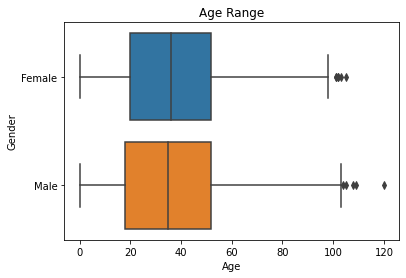

In [122]:
age_range=sns.boxplot(data=census,x='Age',y='Gender')
plt.title('Age Range')
plt.show()


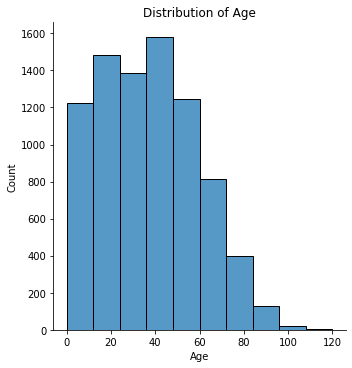

In [123]:
sns.displot(census,x= 'Age',bins=10)
plt.title("Distribution of Age")
plt.show()

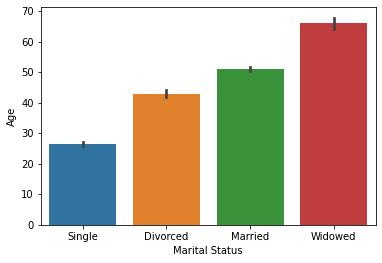

In [124]:
sns.barplot(x='Marital Status', data=census,y='Age')
plt.show()



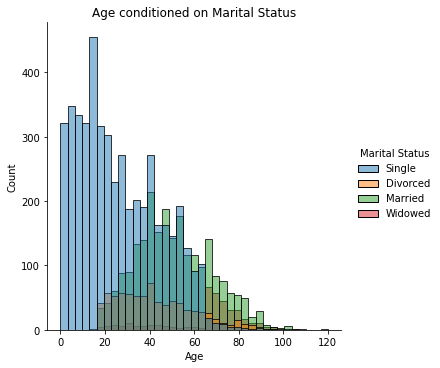

In [125]:
sns.displot(data=census, x='Age',hue='Marital Status')
plt.title("Age conditioned on Marital Status")
plt.show()

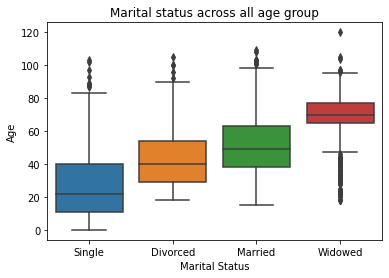

In [126]:
sns.boxplot(data=census,x='Marital Status',y='Age')
plt.title('Marital status across all age group')
plt.show()


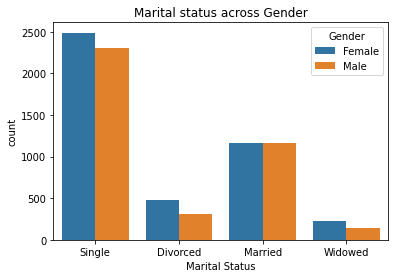

In [127]:
sns.countplot(data=census,x='Marital Status',hue='Gender')
plt.title('Marital status across Gender')
plt.show()


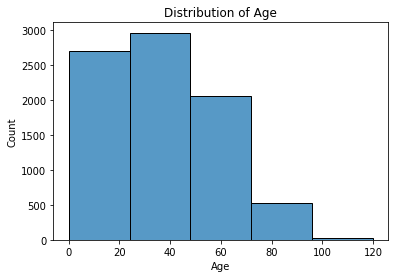

In [128]:
sns.histplot(data=census,x='Age',bins=5)
plt.title('Distribution of Age')
plt.show()

In [129]:
female=census.query("Gender == 'Female'") #segment the gender column to get the females

In [130]:
female

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Leeds Lane,Sian,Wright,64,Head,Single,Female,"Accountant, chartered certified",None,Catholic
1,1,Leeds Lane,Danielle,Dunn,37,None,Divorced,Female,Software engineer,None,None
4,2,Leeds Lane,Olivia,Cross,35,Wife,Married,Female,Secretary/administrator,None,Christian
5,2,Leeds Lane,Rachael,Cross,8,Daughter,Single,Female,Student,None,Undecided
8,3,Leeds Lane,Joyce,Hutchinson,60,Head,Married,Female,"Engineer, communications",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8276,1,Gwynedd Manor,Mandy,Allen,25,Daughter,Single,Female,Chief Technology Officer,None,Christian
8277,1,Gwynedd Manor,Lisa,Allen,24,Daughter,Divorced,Female,"Engineer, agricultural",None,Christian
8278,1,Gwynedd Manor,Rachael,Allen,23,Daughter,Single,Female,"Loss adjuster, chartered",None,Christian
8280,1,Gwynedd Manor,Jane,Allen,14,Daughter,Single,Female,Student,None,Undecided


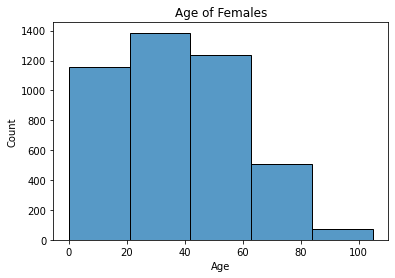

In [131]:
sns.histplot(data=female,x='Age',bins=5)
plt.title('Age of Females')
plt.show()


In [132]:
male=census.query("Gender == 'Male'") #segment the gender column to get the males

In [133]:
male

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Leeds Lane,Anthony,Thorpe,18,None,Single,Male,Student,None,Undecided
3,2,Leeds Lane,Charlie,Cross,33,Head,Married,Male,Mental health nurse,None,Christian
6,2,Leeds Lane,Kieran,Cross,5,Son,Single,Male,Student,None,Undecided
7,2,Leeds Lane,Kieran,Cross,5,Son,Single,Male,Student,None,Undecided
9,3,Leeds Lane,Victor,Hutchinson,61,Husband,Married,Male,Environmental education officer,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8271,1,Gwynedd Manor,Darren,Allen,39,Son,Divorced,Male,"Geologist, wellsite",None,Christian
8272,1,Gwynedd Manor,Stephen,Allen,33,Son,Single,Male,Estate agent,None,Christian
8273,1,Gwynedd Manor,Ricky,Allen,33,Son,Single,Male,Minerals surveyor,None,Christian
8275,1,Gwynedd Manor,Aaron,Allen,26,Son,Single,Male,Toxicologist,None,Christian


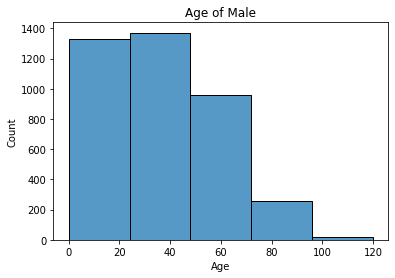

In [134]:
sns.histplot(data=male,x='Age',bins=5)
plt.title('Age of Male')
plt.show()

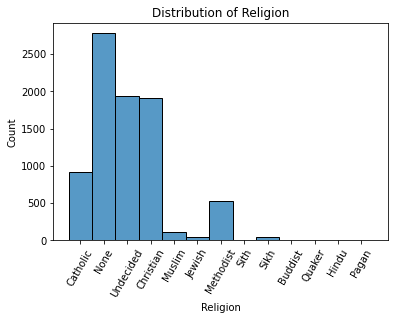

In [135]:
sns.histplot(data=census,x='Religion')
plt.title('Distribution of Religion')
plt.xticks(rotation=60)
plt.show()


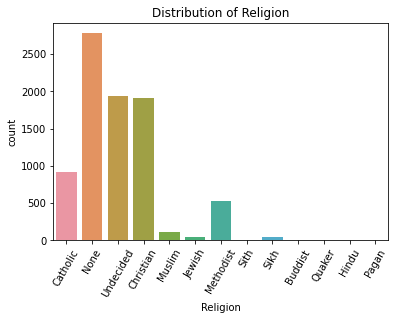

In [136]:
sns.countplot(data=census,x='Religion')
plt.title('Distribution of Religion')
plt.xticks(rotation=60)
plt.show()


In [137]:
#segment the occupation column to get the unemployed
unemployed=census.query("Occupation == 'Unemployed'")

In [138]:
unemployed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
11,4,Leeds Lane,Hollie,Johnson,28,Wife,Married,Female,Unemployed,None,Christian
28,8,Leeds Lane,Stephen,Jones,57,Lodger,Single,Male,Unemployed,None,Jewish
36,11,Leeds Lane,Elliot,Dunn,40,Head,Divorced,Male,Unemployed,None,Catholic
43,15,Leeds Lane,Carly,Brown,58,Head,Divorced,Female,Unemployed,None,Catholic
72,1,Stanley Road,Sandra,Flynn,28,Head,Single,Female,Unemployed,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8202,1,Edwards Obervatory,Jasmine,Miah,27,Daughter,Divorced,Female,Unemployed,None,Christian
8220,1,Brooks House,Alan,Smith,26,None,Single,Male,Unemployed,None,Methodist
8221,1,Brooks House,Gary,Cooper,34,None,Single,Male,Unemployed,None,None
8267,1,Gwynedd Manor,Valerie,Allen,49,Daughter,Single,Female,Unemployed,None,Christian


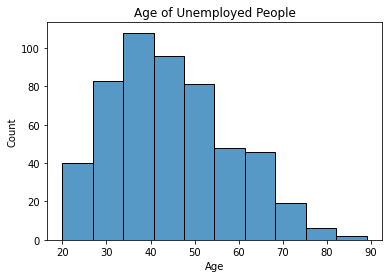

In [139]:
sns.histplot(data=unemployed,x='Age',bins=10)
plt.title('Age of Unemployed People')
plt.show()

In [140]:
male['Age'] #age of males

2       18
3       33
6        5
7        5
9       61
        ..
8271    39
8272    33
8273    33
8275    26
8279    18
Name: Age, Length: 3927, dtype: int32

In [141]:
female['Age']#age of females

0       64
1       37
4       35
5        8
8       60
        ..
8276    25
8277    24
8278    23
8280    14
8281     9
Name: Age, Length: 4355, dtype: int32

In [142]:
#to get the age pyramid of the population
one=0
ten=0
twenty=0
thirty=0
fourty=0
fifty=0
sixty=0
seventy=0
eighty=0
ninty=0
hundred=0

for m in male['Age']:
    if m <= 9:
        one +=1
    elif m >= 10 and m <= 19:
        ten += 1
    elif m >= 20 and m <= 29:
        twenty += 1
    elif m >= 30 and m <= 39:
        thirty += 1
    elif m >= 40 and m <= 49:
        fourty += 1
    elif m >= 50 and m <= 59:
        fifty += 1
    elif m >= 60 and m <= 69:
        sixty += 1
    elif m >= 70 and m <= 79:
        seventy += 1
    elif m >= 80 and m <= 89:
        eighty += 1
    elif m >= 90 and m <= 99:
        ninty += 1
    elif m >= 100:
        hundred += 1
male_d = [one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty,ninty,hundred]
male_d = [(-1)*m for m in male_d]
male_d.reverse()
male_d

[-10, -25, -97, -190, -343, -451, -582, -594, -538, -579, -518]

In [143]:
one=0
ten=0
twenty=0
thirty=0
fourty=0
fifty=0
sixty=0
seventy=0
eighty=0
ninty=0
hundred=0

for f in female['Age']:
    if f <= 9:
        one +=1
    elif f >= 10 and f <= 19:
        ten += 1
    elif f >= 20 and f <= 29:
        twenty += 1
    elif f >= 30 and f <= 39:
        thirty += 1
    elif f >= 40 and f <= 49:
        fourty += 1
    elif f >= 50 and f <= 59:
        fifty += 1
    elif f >= 60 and f <= 69:
        sixty += 1
    elif f >= 70 and f <= 79:
        seventy += 1
    elif f >= 80 and f <= 89:
        eighty += 1
    elif f >= 90 and f <= 99:
        ninty += 1
    elif f >= 100:
        hundred += 1
female_d = [one,ten,twenty,thirty,fourty,fifty,sixty,seventy,eighty,ninty,hundred]
female_d.reverse()
female_d

[6, 10, 106, 214, 362, 544, 718, 673, 641, 595, 486]

In [144]:
age_p =pd.DataFrame({'Male':male_d, 'Female':female_d, 'Age':['100+', '99-90','89-80','79 - 70','69 - 60','59 - 50', '49 - 40','39 -30', '29 - 20','19 - 10','9 - 0']})

order =['100+', '99-90','89-80','79 - 70','69 - 60','59 - 50','49 - 40','39 -30', '29 - 20','19 - 10','9 - 0']

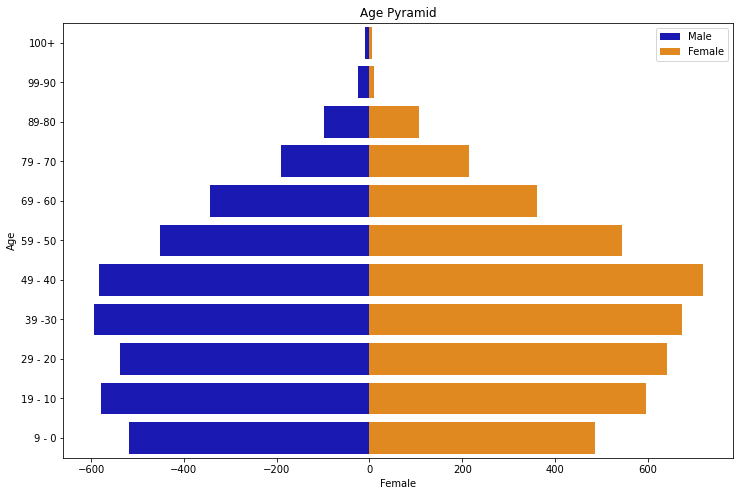

In [145]:
plt.figure(figsize=(12,8))
age_pyramid = sns.barplot(data=age_p, x='Male', y = 'Age', label = 'Male', color = 'mediumblue', order = order)
age_pyramid = sns.barplot(data=age_p,x = 'Female', y ='Age', color = ('darkorange'), label = 'Female', order = order)
age_pyramid.legend()
plt.title('Age Pyramid')
plt.show()

In [146]:
pf.ProfileReport(census).to_file('Overview of Age2')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ACER\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [147]:
from pandas_profiling import ProfileReport

In [148]:
profile=ProfileReport(census,title="An Overview of Census Data")

In [149]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### DETAILED ANALYSIS

#### CRUDE BIRTH RATE

Available at https://www.bing.com/images/search?q=age%20specific%20fertility%20rate%20formula&qs=SC&form=QBIR&sp=1&pq=age%20specific%20firtility%20rate&sc=8-27&cvid=E278EE1F82C24B5BBE2A99AEC6751015&first=1&tsc=ImageBasicHover

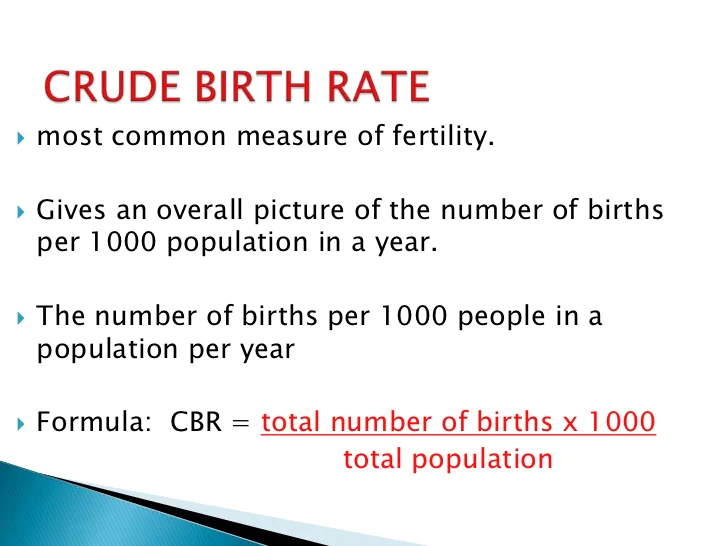

In [150]:
totalpopulation = len(census) #population of the town

In [151]:
len(census)

8282

In [152]:
#calculating births
census[census['Age']==0]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
73,1,Stanley Road,Amy,Flynn,0,Daughter,Single,Female,None,None,Undecided
145,48,Stanley Road,Hayley,Newton,0,Daughter,Single,Female,None,None,Undecided
385,7,Lee Drive,Marilyn,Archer,0,Daughter,Single,Female,None,None,Undecided
445,18,Lee Drive,Ronald,Ahmed,0,Son,Single,Male,None,None,Undecided
603,47,Lee Drive,Luke,Arnold,0,Son,Single,Male,None,None,Undecided
...,...,...,...,...,...,...,...,...,...,...,...
7600,1,Bulldog Avenue,Ashleigh,O'Connor,0,Daughter,Single,Female,None,None,Undecided
7720,18,Baxter Road,Irene,Bray,0,Daughter,Single,Female,None,None,Undecided
7802,53,Mustard View,Amanda,Wood,0,Daughter,Single,Female,None,None,Undecided
7962,148,Mustard View,Reece,Jones,0,Son,Single,Male,None,None,Undecided


In [153]:
len(census[census['Age']==0]) #number of new births

75

In [154]:
births = len(census[census['Age'] == 0])
crudebirthrate = (births/totalpopulation)*1000
crudebirthrate

9.055783627143201

In [155]:
#to get the crude birth rate for previous years 

babies0 = census['Age'] == 0
babies2 = census['Age'] == 2
babies4 = census['Age'] == 4




In [156]:
crudebr = (len(census[babies0])/totalpopulation)*1000 #crude birth rate per 1000

crudebr2year = (len(census[babies2])/len(census))*1000 #crude birth rate for 2 years ago per 1000

print(f"Present Crude Birthrate per 1000: {crudebr}")
print(f"Previous Crude Birthrate per 1000: {crudebr2year}")


print(f"Present CBR Change from Previous per 1000: {crudebr-crudebr2year}")


Present Crude Birthrate per 1000: 9.055783627143201
Previous Crude Birthrate per 1000: 10.866940352571842
Present CBR Change from Previous per 1000: -1.8111567254286403


#### AGE SPECIFIC FIRTILITY RATE

Available at https://www.bing.com/images/search?q=age%20specific%20fertility%20rate%20formula&qs=SC&form=QBIR&sp=1&pq=age%20specific%20firtility%20rate&sc=8-27&cvid=E278EE1F82C24B5BBE2A99AEC6751015&first=1&tsc=ImageBasicHover

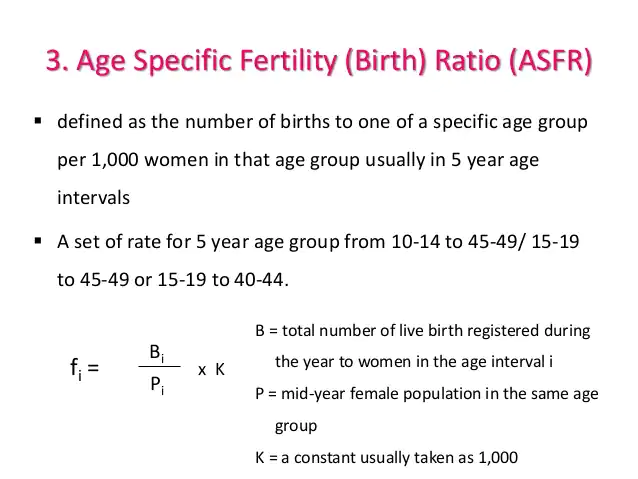

In [157]:
births2529 = len(census[census['Age'] == 0]) #number of live births by females between ages 25-29
age2529 = (census['Age'].between(25,29)) & (census['Gender'] == 'Female') #females between the ages of 25 and 29
age2529 = len(census[age2529])

print((births2529/age2529)*1000)

260.4166666666667


In [158]:

age2529 = (census['Age'].between(25,29)) & (census['Gender'] == 'Female') #females between the ages of 25 and 29
age3034 = (census['Age'].between(30,34)) & (census['Gender'] == 'Female') #females between the ages of 30 and 34
age3540 = (census['Age'].between(35,39)) & (census['Gender'] == 'Female') #females between the ages of 35 and 40

# calculate age-specific fertility rate

asfr2529 = (len(census[babies0])/len(census[age2529]))*1000 #age specific fertility rate per 1000 for females 25-29
asfr3034 = (len(census[babies2])/len(census[age3034]))*1000 #age specific fertility rate per 1000 for females 30-34
asfr3540 = (len(census[babies4])/len(census[age3540]))*1000 #age specific fertility rate per 1000 for females 35-40

print(f"Age Specific Fertility Rate 25-29 per 1000 {asfr2529}")
print(f"Age Specific Fertility Rate 30-34 per 1000 {asfr3034}")
print(f"Age Specific Fertility Rate 35-40 per 1000 {asfr3540}")

Age Specific Fertility Rate 25-29 per 1000 260.4166666666667
Age Specific Fertility Rate 30-34 per 1000 281.25
Age Specific Fertility Rate 35-40 per 1000 274.7875354107649


#### GENERAL FERTILITY RATE

Available at https://www.bing.com/images/search?q=age%20specific%20fertility%20rate%20formula&qs=SC&form=QBIR&sp=1&pq=age%20specific%20firtility%20rate&sc=8-27&cvid=E278EE1F82C24B5BBE2A99AEC6751015&first=1&tsc=ImageBasicHover

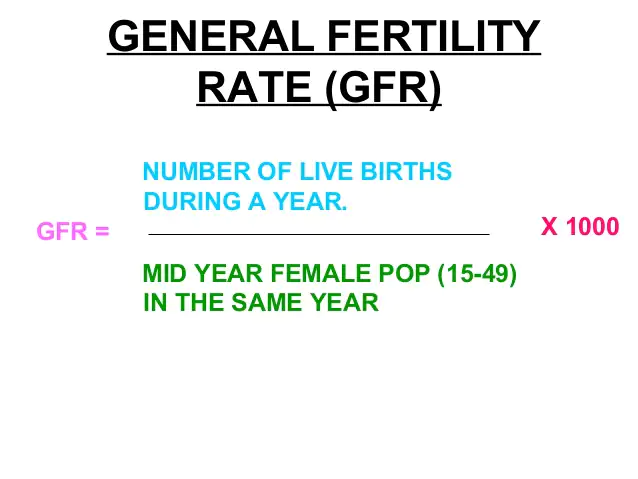

In [159]:
totalbirths = len(census[babies0]) +  len(census[babies2]) + len(census[babies4]) #total number of live births within the last 4 years
cbage = len(census[age2529])+ len(census[age3034])+len(census[age3540]) #total number of females between ages 25-40

gfr = totalbirths/cbage

print(f"General Fertility Rate: {gfr*1000}")

General Fertility Rate: 272.6326742976067


#### CRUDE DEATH RATE

Available at https://www.bing.com/images/search?q=age%20specific%20fertility%20rate%20formula&qs=SC&form=QBIR&sp=1&pq=age%20specific%20firtility%20rate&sc=8-27&cvid=E278EE1F82C24B5BBE2A99AEC6751015&first=1&tsc=ImageBasicHover

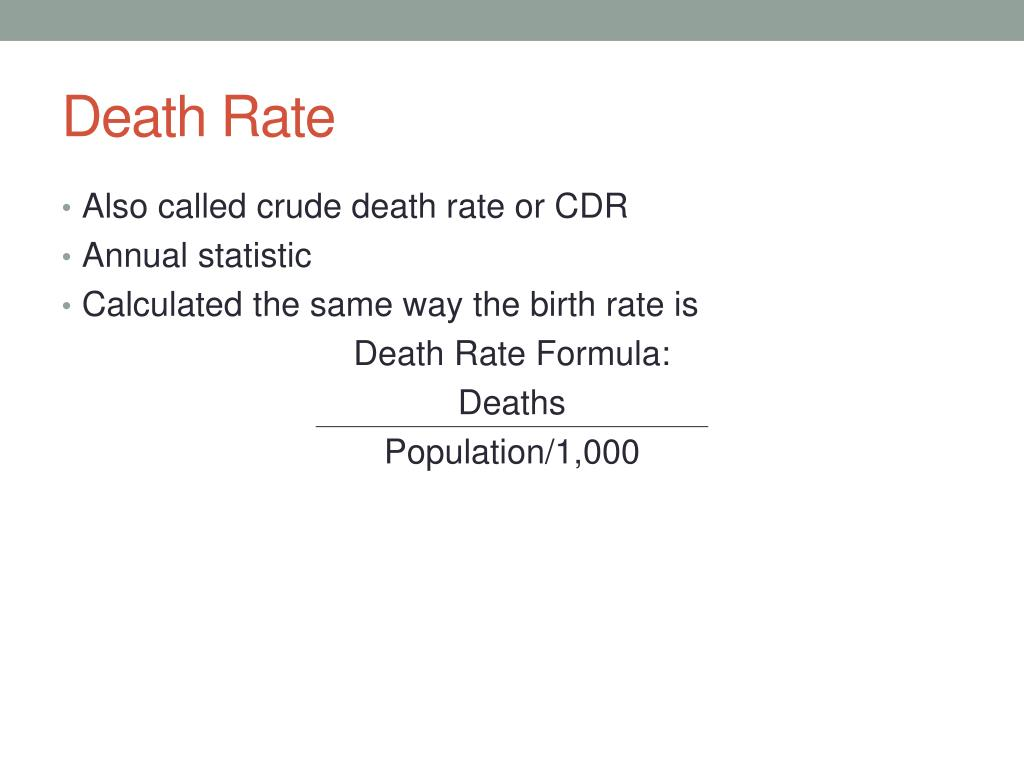

source : back to basics workshop

In [160]:
agingpop = census[census['Age'].between(70,120)].groupby('Age').size().sort_index(ascending=False) #aging population
agingpop

Age
120     1
109     1
108     1
105     2
104     1
103     4
102     2
101     2
100     2
98      3
97      3
96      3
95      4
94      4
93      3
92      4
91      2
90      9
89     15
88     23
87     13
86     15
85     11
84     24
83     31
82     23
81     21
80     27
79     25
78     32
77     35
76     28
75     35
74     43
73     48
72     48
71     57
70     53
dtype: int64

source : back to basics workshop

In [161]:
# get the previous year's count by shifting the ages up by one 

prevagingpop = agingpop.shift(-1)
prevagingpop

Age
120     1.0
109     1.0
108     2.0
105     1.0
104     4.0
103     2.0
102     2.0
101     2.0
100     3.0
98      3.0
97      3.0
96      4.0
95      4.0
94      3.0
93      4.0
92      2.0
91      9.0
90     15.0
89     23.0
88     13.0
87     15.0
86     11.0
85     24.0
84     31.0
83     23.0
82     21.0
81     27.0
80     25.0
79     32.0
78     35.0
77     28.0
76     35.0
75     43.0
74     48.0
73     48.0
72     57.0
71     53.0
70      NaN
dtype: float64

source : back to basics workshop

In [162]:
# calculate the difference between the two sets of aging population count

diff = agingpop - prevagingpop

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want to minus counts only

deaths = diff[diff['Count'] < 0]
deaths

,Age,Count
2,108,-1.0
4,104,-3.0
8,100,-1.0
11,96,-1.0
14,93,-1.0
16,91,-7.0
17,90,-6.0
18,89,-8.0
20,87,-2.0
22,85,-13.0


In [163]:
#to calculate the death rate
deathrate = abs(((deaths['Count']).sum())/totalpopulation)*1000
deathrate

11.470659261048056

#### CRUDE GROWTH RATE

source : back to basics workshop

In [164]:
crudegr= crudebr-deathrate #Crude Growth Rate = Crude Birth Rate - Crude Death Rate
print(f"CGR {crudegr}")
print(f"CGR as Percentage {(crudegr)/10}%") #Divide by ten for percentage

CGR -2.4148756339048543
CGR as Percentage -0.24148756339048544%


#### POPULATION CHANGE

source: back to basics lecture

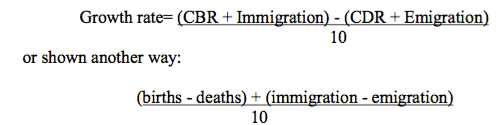

#### OCCUPANCY COUNT

source : back to basics workshop

In [165]:
household_occs = census.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count') #occupancy rate
household_occs

,House Number,Street,Occupancy Count
0,0,Bank Lane,1
1,0,Clarke Avenue,1
2,0,Thames Lane,1
3,1,Adams Vista,2
4,1,Ali Avenue,1
...,...,...,...
3095,229,Robinson Way,7
3096,230,Robinson Way,4
3097,231,Robinson Way,5
3098,232,Robinson Way,1


In [166]:
avg_occupancycount = round(household_occs['Occupancy Count'].mean()) #average household occupancy count


In [167]:
avg_occupancycount

3

In [168]:
difference = avg_occupancycount - household_occs['Occupancy Count']

In [169]:
aboveavg_occupancycount = []
for i in difference:
    if i < 0:
        aboveavg_occupancycount.append(i)
len(aboveavg_occupancycount)       

853

#### UNEMPLOYMENT RATE

available at https://www.bing.com/images/search?q=unemployment+rate+formula&qs=MM&form=QBIRMH&sp=2&pq=employment+rate+formula&sk=MM1&sc=8-23&cvid=DDADBC2D3A9D43DEBBE03535D948EF63&first=1&tsc=ImageBasicHover

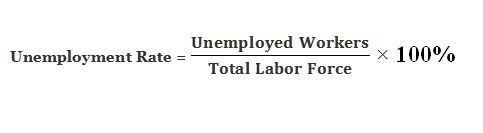

In [170]:
len(unemployed)#number of unemployed people in the population

529

In [171]:
census[(census['Occupation']=='Unemployed') & (census['Age'].between(20,60))] #number of unemployed people within the legal age to be employed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
11,4,Leeds Lane,Hollie,Johnson,28,Wife,Married,Female,Unemployed,None,Christian
28,8,Leeds Lane,Stephen,Jones,57,Lodger,Single,Male,Unemployed,None,Jewish
36,11,Leeds Lane,Elliot,Dunn,40,Head,Divorced,Male,Unemployed,None,Catholic
43,15,Leeds Lane,Carly,Brown,58,Head,Divorced,Female,Unemployed,None,Catholic
72,1,Stanley Road,Sandra,Flynn,28,Head,Single,Female,Unemployed,None,None
...,...,...,...,...,...,...,...,...,...,...,...
8202,1,Edwards Obervatory,Jasmine,Miah,27,Daughter,Divorced,Female,Unemployed,None,Christian
8220,1,Brooks House,Alan,Smith,26,None,Single,Male,Unemployed,None,Methodist
8221,1,Brooks House,Gary,Cooper,34,None,Single,Male,Unemployed,None,None
8267,1,Gwynedd Manor,Valerie,Allen,49,Daughter,Single,Female,Unemployed,None,Christian


In [172]:
#to get the population of unemployed i.e unemployed workers
unemployed_workers=len(census[(census['Occupation']=='Unemployed') & (census['Age'].between(20,60))])

In [173]:
unemployed_workers

450

In [174]:
census[(census['Age'].between(20,60))] #age range of people that are eligible to work

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Leeds Lane,Danielle,Dunn,37,None,Divorced,Female,Software engineer,None,None
3,2,Leeds Lane,Charlie,Cross,33,Head,Married,Male,Mental health nurse,None,Christian
4,2,Leeds Lane,Olivia,Cross,35,Wife,Married,Female,Secretary/administrator,None,Christian
8,3,Leeds Lane,Joyce,Hutchinson,60,Head,Married,Female,"Engineer, communications",None,Christian
10,4,Leeds Lane,Derek,Johnson,29,Head,Married,Male,IT technical support officer,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8274,1,Gwynedd Manor,Alice,Allen,27,Adopted Daughter,Single,Female,Public relations officer,None,Christian
8275,1,Gwynedd Manor,Aaron,Allen,26,Son,Single,Male,Toxicologist,None,Christian
8276,1,Gwynedd Manor,Mandy,Allen,25,Daughter,Single,Female,Chief Technology Officer,None,Christian
8277,1,Gwynedd Manor,Lisa,Allen,24,Daughter,Divorced,Female,"Engineer, agricultural",None,Christian


In [175]:
total_labour=len(census[(census['Age'].between(20,60))]) #number of people that are eligible to work i.e total labour force

In [176]:
total_labour

4826

In [177]:
unemployment_rate = (unemployed_workers/total_labour)*100

In [178]:
unemployment_rate

9.324492333195193

#### COMMUTERS

In [179]:
university_student_commuters= len(census[(census['Occupation']=='University Student')]) #segment the occupation column to get the university students

In [180]:
university_student_commuters

538

In [181]:
phd_student_commuters= len(census[(census['Occupation']=='PhD Student')]) #segment the occupation column to get the phd students

In [182]:
phd_student_commuters

14

In [183]:
lecturer_commuters= len(census[(census['Occupation']=='Higher education lecturer')]) #segment the occupation column to get the higher education lecturers

In [184]:
lecturer_commuters

3

In [185]:
career_adviser_commuters= len(census[(census['Occupation']=='Higher education careers adviser')])#segment the occupation column to get the higher education careers adviser


In [186]:
career_adviser_commuters

4

In [187]:
occupation_commuters = university_student_commuters + phd_student_commuters + lecturer_commuters + career_adviser_commuters #number of commuters based on occupation

In [188]:
occupation_commuters 

559

In [189]:
census.Religion.unique()

array(['Catholic', 'None', 'Undecided', 'Christian', 'Muslim', 'Jewish',
       'Methodist', 'Sith', 'Sikh', 'Buddist', 'Quaker', 'Hindu', 'Pagan'],
      dtype=object)

In [190]:
religion_byage=census.groupby('Religion')['Age'] #grouping the religion by age


In [191]:
round((religion_byage).mean()) #average age of the different religions

Religion
Buddist      48.0
Catholic     43.0
Christian    51.0
Hindu        36.0
Jewish       44.0
Methodist    46.0
Muslim       32.0
None         43.0
Pagan        43.0
Quaker       19.0
Sikh         31.0
Sith         67.0
Undecided     9.0
Name: Age, dtype: float64

In [192]:
catholics = len(census[(census['Religion']=='Catholic')]) #number of catholics within the population

In [193]:
catholics

914

In [194]:
totalpopulation

8282

In [195]:
(catholics/totalpopulation)*100 #percentage of catholics within the population

11.035981646945183

In [196]:
totalpopulation-catholics #the number of non catholics

7368

In [197]:
christian_commuters= census[(census['Religion']=='Christian')] #segment the religion column to get the number of christians


In [198]:
len(christian_commuters)

1911

In [199]:
muslim_commuters= census[(census['Religion']=='Muslim')]#segment the religion column to get the number of muslims


In [200]:
len(muslim_commuters)

116

In [201]:
jewish_commuters= census[(census['Religion']=='Jewish')] #segment the religion column to get the number of jewish worshipers


In [202]:
len(jewish_commuters)

42

In [203]:
methodist_commuters= census[(census['Religion']=='Methodist')] #segment the religion column to get the number of methodist members


In [204]:
len(methodist_commuters)

533